In [ ]:
!pip install -q -U transformers==4.37.2
!pip install --upgrade "transformers>=4.47.0" "peft>=0.9.0"
!pip install -q  accelerate==0.26.0
!pip install --upgrade "accelerate>=0.27.0"
!pip install --prefer-binary bitsandbytes
!pip install -U bitsandbytes
!python -m bitsandbytes
!nvidia-smi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 128.6 MB/s eta 0:00:00


In [ ]:
# Built-in libraries
import os
import json
import random
import re
from copy import deepcopy
from typing import Dict, List, Optional, Tuple, Union
import tqdm


# Scientific computing
import numpy as np
import pandas as pd
from scipy.stats import zscore, linregress
from scipy.spatial import ConvexHull

# PyTorch
import torch
import torch.nn.functional as F
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,random_split, Subset
# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import seaborn as sns
from matplotlib.pyplot import Normalize
import matplotlib.patches as patches

# Machine Learning / Dimensionality Reduction
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
# Transformers / Hugging Facea
from transformers import (
    AutoProcessor,
    AutoModel,
    AutoTokenizer,
    CLIPModel,
    CLIPProcessor,
    CLIPImageProcessor,
    BitsAndBytesConfig,
    AutoModelForVision2Seq,
    pipeline,
    Trainer,
    TrainingArguments,
    TrainerCallback,
    TrainerState,
    TrainerControl,
    LlavaForConditionalGeneration
)

# PEFT Imports
from peft import PeftModel, PeftConfig, get_peft_model,LoraConfig,TaskType


# UMAP
import umap

# Image processing
from PIL import Image

# SafeTensors
from safetensors.torch import load_file, save_file

In [ ]:
from google.colab import drive
import sys
drive.mount('/content/drive')

modules_dir = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/Modules'
sys.path.append(modules_dir)

from llava_utils import *
from val_test_funs import *
from data_utils import *



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)
model_name = "llava-hf/llava-1.5-7b-hf"
adapter_path_llava_finetuned_without_boosted_vit_ccnl2 = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 8 - Full LLaVA Pipeline Finetuning/VIT and Projector/8.1.1/pipeline_with_baseline_vit/adapters'

adapter_path_llava_finetuned_with_boosted_vit = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 8 - Full LLaVA Pipeline Finetuning/VIT and Projector/8.1.1/pipeline_with_tuned_vit_1/adapters'
adapter_path_llava_finetuned_with_boosted_vit_ccnl2_even_tuned = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 8 - Full LLaVA Pipeline Finetuning/VIT and Projector/8.1.2/pipeline_with_ccnl2_trained_only_even_tuned_vit_1'

boosted_vit_path = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp6/vit_zoo/clevr_finetuned_1'



In [ ]:
processor,baseline_no_boosted_model = get_inference_ready_model(model_name, None , None , quantization_config, load_from_local=False, local_model_path=None, no_quantize=False)
tokenizer = processor.tokenizer

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
processor,finetuned__on_CCNL2_no_boosted_model = get_inference_ready_model(model_name,adapter_path_llava_finetuned_without_boosted_vit_ccnl2  , None , quantization_config, load_from_local=False, local_model_path=None, no_quantize=False)
tokenizer = processor.tokenizer

KeyboardInterrupt: 

In [ ]:
#Loading the ViT Boosted model that was finetuned on train set of CCNL2:
adapter_path_llava_finetuned_with_boosted_vit = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 8 - Full LLaVA Pipeline Finetuning/ABLATIONS/R_8TUNED_ON_CCNL2TRAIN_HIGHER_LR_FUL_TUNED_VIT'

processor,finetuned_on_CCNL2_boosted_model_1 = get_inference_ready_model(model_name, adapter_path_llava_finetuned_with_boosted_vit, boosted_vit_path , quantization_config,
                               load_from_local=False, local_model_path=None, no_quantize=False)
tokenizer = processor.tokenizer

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

🔧 ViTClassifier init: mode=cls, svd=False, feature_dim=1024, classifier_input=1024
Loaded PEFT model with randomly initialized classifier head
Quantizing merged model...


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading language model adapter from /content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 8 - Full LLaVA Pipeline Finetuning/ABLATIONS/R_8TUNED_ON_CCNL2TRAIN_HIGHER_LR_FUL_TUNED_VIT


In [ ]:
# Creating the Difference Datsets

test_ojects_ccnl2 = ['knives','bottles','buttons']
CCNL2_dataset_path = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/CCNL2'
CCNL2_test_dataset= ImageTextDataset(
    image_base_path=CCNL2_dataset_path,
    dataset='CCNL2',
    processor=processor,
    nums= [1,2,3,4,5,6,7,8,9,10]  ,
    categories=test_ojects_ccnl2,
    test_mode=True,
    undersamp_ratio =1)

# Create Yes/No dataset for CCNL2 test set
ccnl2_yesno_test_dataset_diff2 = YesNoDataset(
    dataset_instance=CCNL2_test_dataset,
    nums_per_image=1,              # number of random D values per image
    use_basic_augmentation=False,  # no augmentation for test
    test_mode=True,
    only_diff=True,
    diff_amount=2)
ccnl2_yesno_test_dataset_diff3 = YesNoDataset(
    dataset_instance=CCNL2_test_dataset,
    nums_per_image=1,              # number of random D values per image
    use_basic_augmentation=False,  # no augmentation for test
    test_mode=True,
    only_diff=True,
    diff_amount=3)


ccnl2_yesno_test_dataset_diff4 = YesNoDataset(
    dataset_instance=CCNL2_test_dataset,
    nums_per_image=1,              # number of random D values per image
    use_basic_augmentation=False,  # no augmentation for test
    test_mode=True,
    only_diff=True,
    diff_amount=4)


In [ ]:
# Display first 10 samples
for i in range(10):
    pixel_values, input_ids, attention_mask, labels, label, image_path = ccnl2_yesno_test_dataset_diff4[i]

    # Decode the prompt
    prompt = tokenizer.decode(input_ids, skip_special_tokens=True)

    print(f"Sample {i}:")
    print(f"Prompt: {prompt}")
    print(f"Ground Truth: {label}")
    print(f"Image: {image_path}")
    print("-" * 80)

Sample 0:
Prompt: USER:  
Are there more than 4 objects in this image? Please answer with yes or no.
ASSISTANT:
Ground Truth: no
Image: /content/drive/MyDrive/Modality Gap and Numerosity Thesis/CCNL2/1_bottles_2048.png
--------------------------------------------------------------------------------
Sample 1:
Prompt: USER:  
Are there less than 4 objects in this image? Please answer with yes or no.
ASSISTANT:
Ground Truth: yes
Image: /content/drive/MyDrive/Modality Gap and Numerosity Thesis/CCNL2/1_bottles_2048.png
--------------------------------------------------------------------------------
Sample 2:
Prompt: USER:  
Are there more than 3 objects in this image? Please answer with yes or no.
ASSISTANT:
Ground Truth: yes
Image: /content/drive/MyDrive/Modality Gap and Numerosity Thesis/CCNL2/6_bottles_2260.png
--------------------------------------------------------------------------------
Sample 3:
Prompt: USER:  
Are there less than 9 objects in this image? Please answer with yes or n

In [ ]:
def simple_manual_inference(model_untuned, model_tuned, tokenizer, dataset,num_predictions=True, device=None):
    model_untuned.eval()
    model_tuned.eval()

    preds_untuned = []
    preds_tuned = []
    ground_truths = []


    with torch.no_grad():
        for i in range(len(dataset)):
            item = dataset[i]
            pixel_values = item[0].unsqueeze(0).to(device)
            attn_mask = item[2].unsqueeze(0).to(device)
            input_ids = item[1].unsqueeze(0).to(device)
            gt = item[4]



            outputs_untuned = model_untuned.generate(
                pixel_values=pixel_values,
                input_ids=input_ids,
                attention_mask=attn_mask,
                max_new_tokens=5,
                do_sample=False
            )

            outputs_tuned = model_tuned.generate(
                pixel_values=pixel_values,
                input_ids=input_ids,
                attention_mask=attn_mask,
                max_new_tokens=5,
                do_sample=False
            )

            decoded_untuned = tokenizer.decode(outputs_untuned[0], skip_special_tokens=True)
            decoded_tuned = tokenizer.decode(outputs_tuned[0], skip_special_tokens=True)

            if num_predictions:
             pred_untuned = extract_number(decoded_untuned)
             pred_tuned = extract_number(decoded_tuned)
            else:
              pred_untuned = decoded_untuned
              pred_tuned = decoded_tuned




            preds_untuned.append(pred_untuned)
            preds_tuned.append(pred_tuned)
            ground_truths.append(gt)

            print(f"Sample {i+1}/{len(dataset)} | GT: {gt} | Untuned: {pred_untuned} | Tuned: {pred_tuned}")

    return preds_untuned, preds_tuned, ground_truths

In [ ]:
import pickle
save_path = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 9 - Does It Really Understand Better Now?/non_tuned_yesno_performance'

# results_CCNL2_yes_no_diff2 = inference_yes_no(baseline_no_boosted_model, ccnl2_yesno_test_dataset_diff2, tokenizer, device, batch_size=8)
# results_CCNL2_yes_no_diff3 = inference_yes_no(baseline_no_boosted_model, ccnl2_yesno_test_dataset_diff3, tokenizer, device, batch_size=8)
# results_CCNL2_yes_no_diff4 = inference_yes_no(baseline_no_boosted_model, ccnl2_yesno_test_dataset_diff4, tokenizer, device, batch_size=8)

# Save all results
with open(f'{save_path}_diff2.pkl', 'wb') as f:
    pickle.dump(results_CCNL2_yes_no_diff2, f)

with open(f'{save_path}_diff3.pkl', 'wb') as f:
    pickle.dump(results_CCNL2_yes_no_diff3, f)

with open(f'{save_path}_diff4.pkl', 'wb') as f:
    pickle.dump(results_CCNL2_yes_no_diff4, f)

print(f"Saved results to {save_path}_diff[2,3,4].pkl")

Saved results to /content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 9 - Does It Really Understand Better Now?/non_tuned_yesno_performance_diff[2,3,4].pkl


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def plot_category_results(category_results, figsize=(12, 8)):
    """
    Plot overall accuracy results from inference_yes_no function.

    Args:
        category_results: Dict with category names as keys and dict of
                         predictions/ground_truths/true_counts as values
        figsize: Figure size tuple
    """
    # Collect all predictions and ground truths across categories
    all_preds = []
    all_gts = []
    all_true_counts = []

    for cat in category_results.keys():
        all_preds.extend(category_results[cat]['predictions'])
        all_gts.extend(category_results[cat]['ground_truths'])
        all_true_counts.extend(category_results[cat]['true_counts'])

    # Calculate overall accuracy
    correct = sum(str(p) == str(g) for p, g in zip(all_preds, all_gts))
    overall_accuracy = correct / len(all_preds) * 100 if len(all_preds) > 0 else 0

    # Create figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # 1. Accuracy by true count
    ax1 = axes[0]
    count_accuracy = {}
    for tc, p, g in zip(all_true_counts, all_preds, all_gts):
        if tc not in count_accuracy:
            count_accuracy[tc] = {'correct': 0, 'total': 0}
        count_accuracy[tc]['total'] += 1
        if str(p) == str(g):
            count_accuracy[tc]['correct'] += 1

    counts = sorted(count_accuracy.keys())
    accs_by_count = [count_accuracy[c]['correct']/count_accuracy[c]['total']*100
                     for c in counts]
    sample_counts = [count_accuracy[c]['total'] for c in counts]

    ax1.plot(counts, accs_by_count, marker='o', linewidth=2, markersize=8, color='steelblue')
    ax1.axhline(y=overall_accuracy, color='r', linestyle='--',
                label=f'Overall: {overall_accuracy:.1f}%')
    ax1.set_xlabel('True Object Count', fontsize=11)
    ax1.set_ylabel('Accuracy (%)', fontsize=11)
    ax1.set_title('Accuracy by Object Count', fontsize=12, fontweight='bold')
    ax1.grid(alpha=0.3)
    ax1.set_xticks(counts)
    ax1.legend()

    # Add sample counts as text
    for count, acc, n_samples in zip(counts, accs_by_count, sample_counts):
        ax1.text(count, acc + 2, f'n={n_samples}', ha='center', fontsize=8, alpha=0.7)

    # 2. Overall statistics
    ax2 = axes[1]
    ax2.axis('off')

    # Count prediction distribution
    pred_counter = Counter([str(p) for p in all_preds])
    gt_counter = Counter([str(g) for g in all_gts])

    stats_text = f"""
    Overall Statistics
    {'='*40}

    Total Samples: {len(all_preds)}
    Overall Accuracy: {overall_accuracy:.2f}%
    Correct Predictions: {correct}/{len(all_preds)}

    Count Range: {min(all_true_counts)} - {max(all_true_counts)}

    Best Count: {counts[np.argmax(accs_by_count)]}
                ({max(accs_by_count):.1f}% accuracy)

    Worst Count: {counts[np.argmin(accs_by_count)]}
                 ({min(accs_by_count):.1f}% accuracy)

    Top 3 Predictions:
    {chr(10).join(f'  {pred}: {count}' for pred, count in pred_counter.most_common(3))}
    """

    ax2.text(0.1, 0.5, stats_text, fontsize=11, family='monospace',
             verticalalignment='center')

    plt.tight_layout()
    plt.show()

    return fig

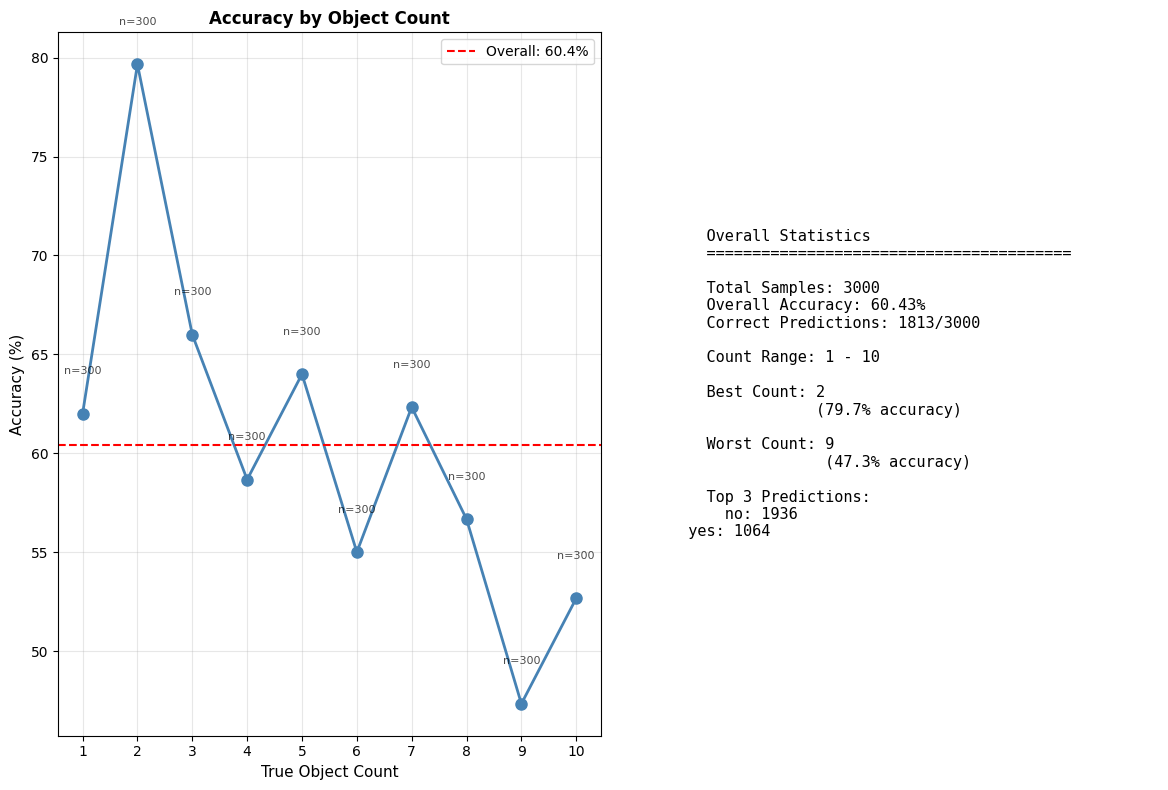

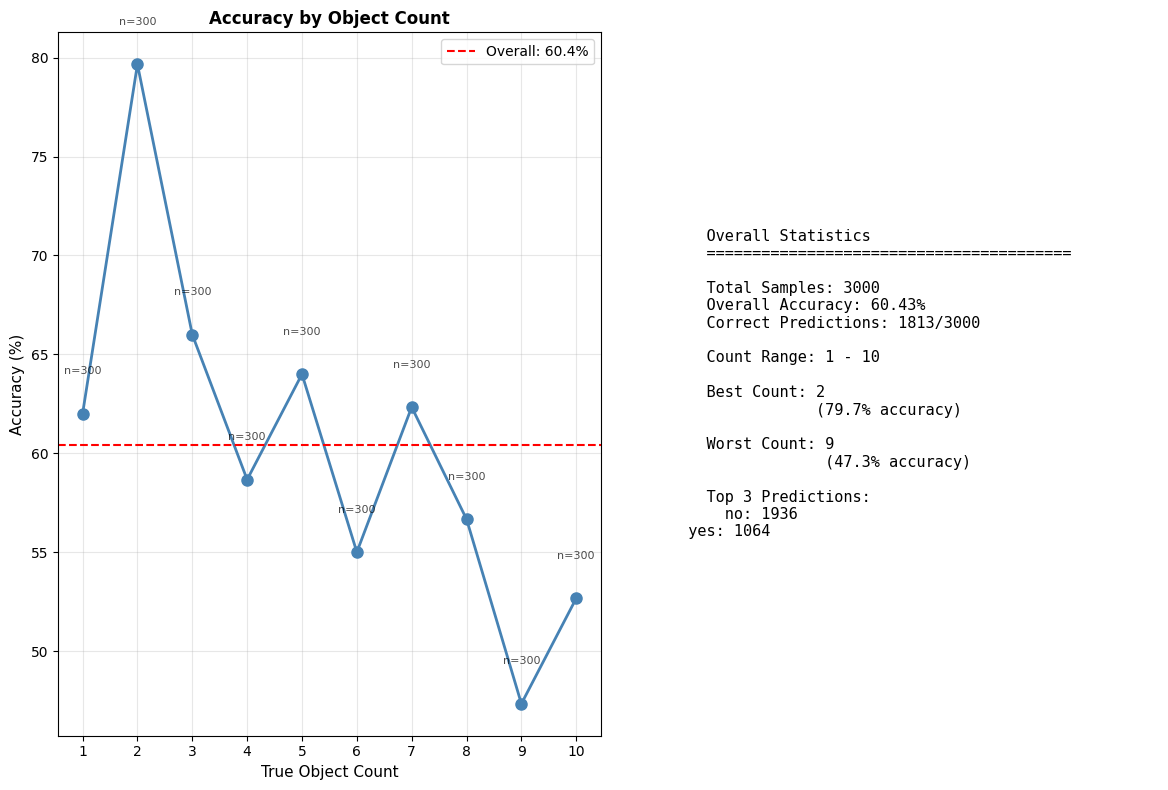

In [ ]:
plot_category_results(results_CCNL2_yes_no_diff3_base)

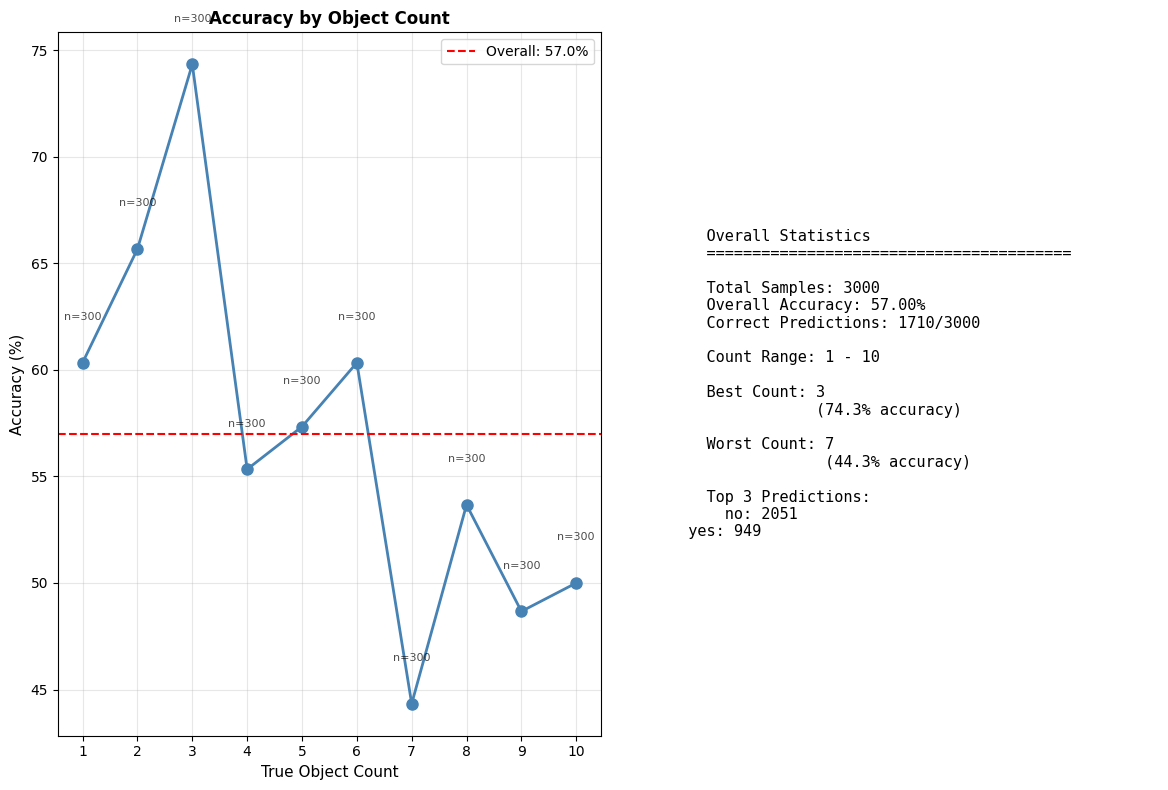

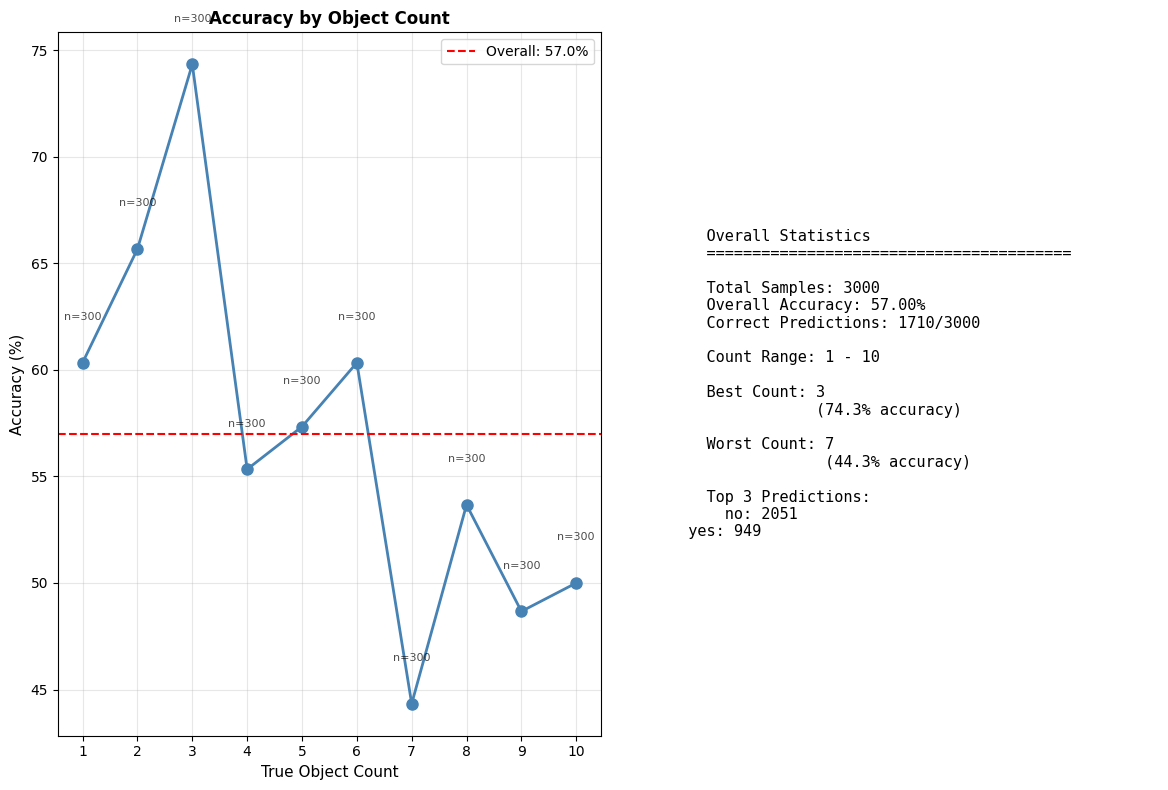

In [ ]:
plot_category_results(results_CCNL2_yes_no_diff2_base)

In [ ]:
results_CCNL2_yes_no_diff3_base = inference_yes_no(baseline_no_boosted_model, ccnl2_yesno_test_dataset_diff3, tokenizer, device, batch_size=8)
results_CCNL2_yes_no_diff2_base = inference_yes_no(baseline_no_boosted_model, ccnl2_yesno_test_dataset_diff2, tokenizer, device, batch_size=8)

Categories: 100%|██████████| 3/3 [12:26<00:00, 248.81s/it]


In [ ]:
results_CCNL2_yes_no_diff3_tuned = inference_yes_no(finetuned_on_CCNL2_boosted_model_1, ccnl2_yesno_test_dataset_diff3, tokenizer, device, batch_size=8)
results_CCNL2_yes_no_diff2_tuned = inference_yes_no(finetuned_on_CCNL2_boosted_model_1, ccnl2_yesno_test_dataset_diff2, tokenizer, device, batch_size=8)

Categories: 100%|██████████| 3/3 [12:30<00:00, 250.22s/it]


In [ ]:
results_CCNL2_yes_no_diff3_base

{'bottles': {'predictions': ['no',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'no',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'no',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'no',
   'no',
   'yes',
   'no',
   'no',
   'no',
   'yes',
   'no',
   'no',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'no',
   'no',
   'no',
   'no',
   'no',
   'no',
   'no',
   'no',
   'no',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'no',
   'no',
   'yes',
   'no',
   'yes',
   'no',
   'yes',
   'no'

In [ ]:
import pickle

save_path = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 9 - Does It Really Understand Better Now?/non_tuned_yesno_performance'

# Load results
with open(f'{save_path}_diff2.pkl', 'rb') as f:
    results_CCNL2_yes_no_diff2 = pickle.load(f)

with open(f'{save_path}_diff3.pkl', 'rb') as f:
    results_CCNL2_yes_no_diff3 = pickle.load(f)

with open(f'{save_path}_diff4.pkl', 'rb') as f:
    results_CCNL2_yes_no_diff4 = pickle.load(f)

In [ ]:
def plot_category_wise_results(results_dict, title=None):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    valid_categories = {cat: data for cat, data in results_dict.items()
                        if len(data['predictions']) > 0 and len(data['ground_truths']) > 0}

    if not valid_categories:
        print("No valid categories with predictions found!")
        return

    category_names = sorted(valid_categories.keys())

    category_accuracies = []

    for cat in category_names:
        preds = np.array(valid_categories[cat]['predictions'])
        gts = np.array(valid_categories[cat]['ground_truths'])
        category_accuracies.append((preds == gts).mean())

    # Overall accuracy
    all_preds = np.concatenate([valid_categories[c]['predictions'] for c in category_names])
    all_gts = np.concatenate([valid_categories[c]['ground_truths'] for c in category_names])
    overall_acc = (all_preds == all_gts).mean()

    print(f"\n📊 Overall Accuracy: {overall_acc:.4f}\n")

    # Category Accuracy plot
    fig, ax = plt.subplots(figsize=(10, 5))
    x_pos = np.arange(len(category_names))
    ax.bar(x_pos, category_accuracies)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(category_names, rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_title(f"Accuracy per Object Category — {title}" if title else "Accuracy per Object Category")
    plt.tight_layout(); plt.show()

    # Global confusion matrix
    classes = np.unique(np.concatenate([all_preds, all_gts]))
    cm = confusion_matrix(all_gts, all_preds, labels=classes)

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot(cmap="Blues", colorbar=True, ax=ax)
    ax.invert_yaxis()
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom')
    ax.set_title(f"Global Confusion Matrix — {title}" if title else "Global Confusion Matrix")
    plt.tight_layout(); plt.show()



📊 Overall Accuracy: 0.6825



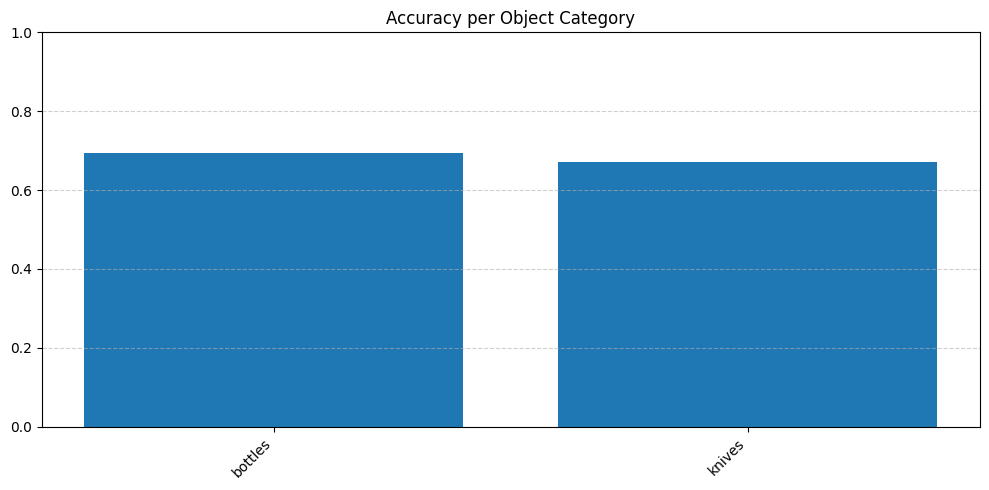

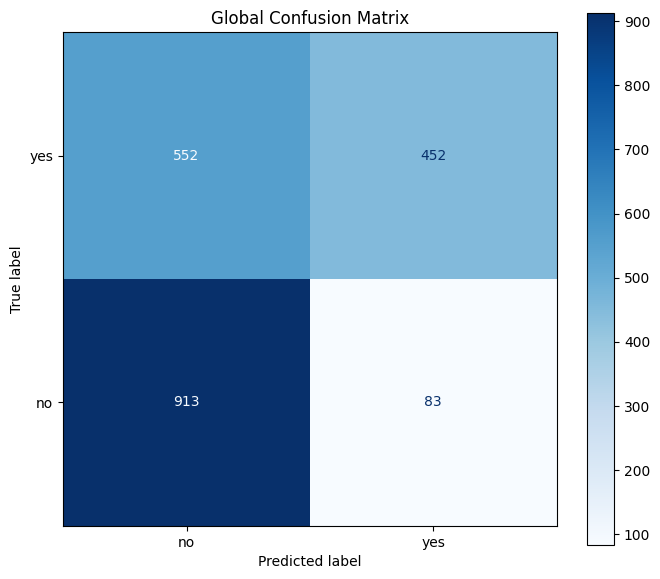

In [ ]:
plot_category_wise_results(results_CCNL2_yes_no_diff4 )


📊 Overall Accuracy: 0.6520



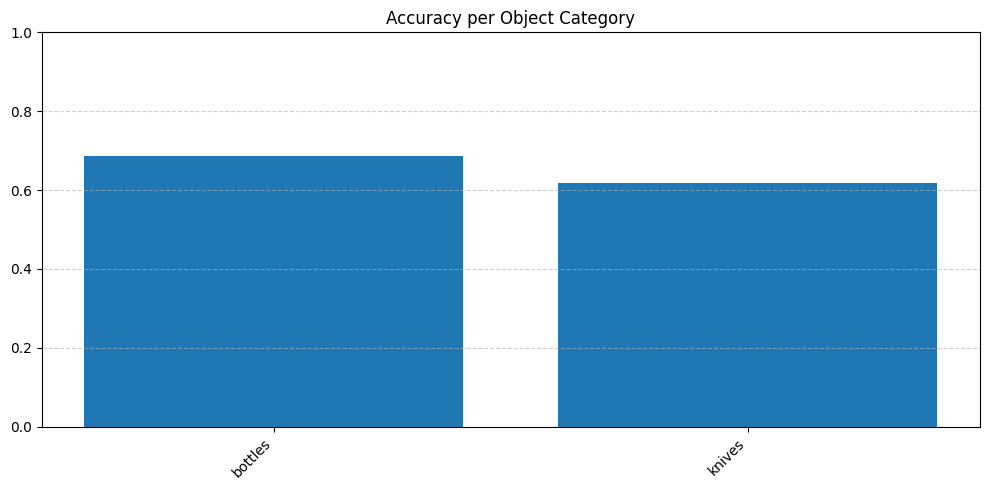

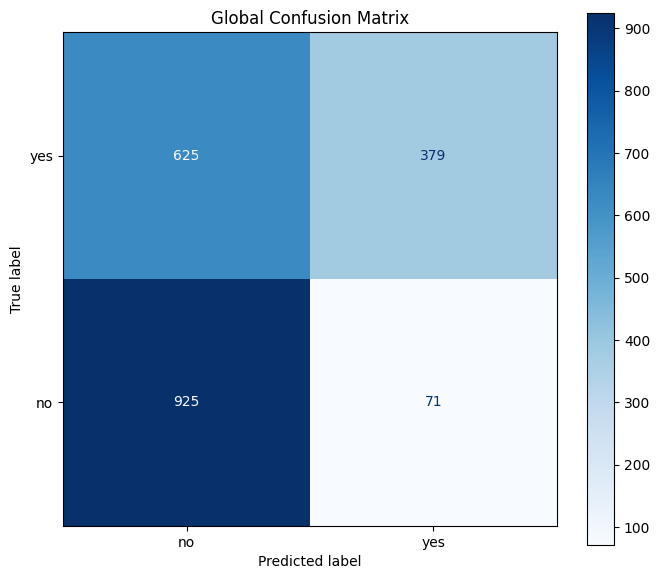

In [ ]:
plot_category_wise_results(results_CCNL2_yes_no_diff3 )


📊 Overall Accuracy: 0.5805



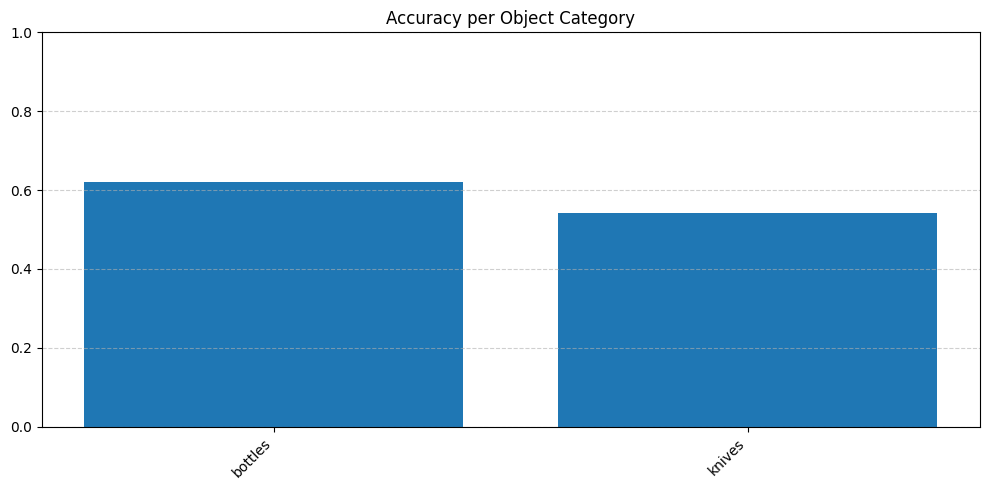

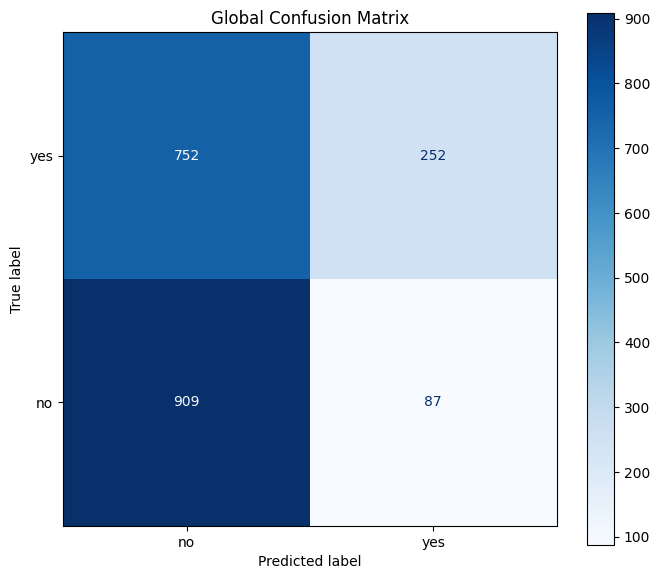

In [ ]:
plot_category_wise_results(results_CCNL2_yes_no_diff2 )

In [ ]:
import pickle

save_path = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 9 - Does It Really Understand Better Now?/tuned_1_yesno_performance'

# Load results
with open(f'{save_path}_diff2.pkl', 'rb') as f:
    results_CCNL2_yes_no_diff2 = pickle.load(f)

with open(f'{save_path}_diff3.pkl', 'rb') as f:
    results_CCNL2_yes_no_diff3 = pickle.load(f)

with open(f'{save_path}_diff4.pkl', 'rb') as f:
    results_CCNL2_yes_no_diff4 = pickle.load(f)

print("✅ Results loaded successfully.")

✅ Results loaded successfully.


In [ ]:
import pickle
save_path = '/content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 9 - Does It Really Understand Better Now?/tuned_1_yesno_performance'

results_CCNL2_yes_no_diff2 = inference_yes_no(finetuned_on_CCNL2_boosted_model_1 , ccnl2_yesno_test_dataset_diff2, tokenizer, device, batch_size=8)
results_CCNL2_yes_no_diff3 = inference_yes_no(finetuned_on_CCNL2_boosted_model_1 , ccnl2_yesno_test_dataset_diff3, tokenizer, device, batch_size=8)
results_CCNL2_yes_no_diff4 = inference_yes_no(finetuned_on_CCNL2_boosted_model_1 , ccnl2_yesno_test_dataset_diff4, tokenizer, device, batch_size=8)

# Save all results
with open(f'{save_path}_diff2.pkl', 'wb') as f:
    pickle.dump(results_CCNL2_yes_no_diff2, f)

with open(f'{save_path}_diff3.pkl', 'wb') as f:
    pickle.dump(results_CCNL2_yes_no_diff3, f)

with open(f'{save_path}_diff4.pkl', 'wb') as f:
    pickle.dump(results_CCNL2_yes_no_diff4, f)

print(f"Saved results to {save_path}_diff[2,3,4].pkl")

Categories: 100%|██████████| 2/2 [08:44<00:00, 262.39s/it]


Saved results to /content/drive/MyDrive/Modality Gap and Numerosity Thesis/Experiments/Exp 9 - Does It Really Understand Better Now?/tuned_1_yesno_performance_diff[2,3,4].pkl


In [ ]:
def plot_category_wise_results(results_dict, title=None, save_path=None):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    valid_categories = {cat: data for cat, data in results_dict.items()
                        if len(data['predictions']) > 0 and len(data['ground_truths']) > 0}

    if not valid_categories:
        print("No valid categories with predictions found!")
        return

    category_names = sorted(valid_categories.keys())

    category_accuracies = []
    category_naes = []

    def compute_nae(preds, gts):
        preds = np.array(preds); gts = np.array(gts)
        if len(preds) == 0:
            return np.nan
        return np.mean(np.abs(preds - gts) / gts)

    for cat in category_names:
        preds = np.array(valid_categories[cat]['predictions'])
        gts = np.array(valid_categories[cat]['ground_truths'])
        category_accuracies.append((preds == gts).mean())
        category_naes.append(compute_nae(preds, gts))

    # -------------------------------------------------------------
    # Compute overall accuracy
    # -------------------------------------------------------------
    all_preds = np.concatenate([valid_categories[c]['predictions'] for c in category_names])
    all_gts = np.concatenate([valid_categories[c]['ground_truths'] for c in category_names])

    overall_acc = (all_preds == all_gts).mean()
    overall_nae = np.mean(np.abs(all_preds - all_gts) / all_gts)

    print("\n📊 Overall Metrics Summary")
    print(f"   ➤ Overall Accuracy: {overall_acc:.4f}")
    print(f"   ➤ Overall NAE:      {overall_nae:.4f}\n")
    # -------------------------------------------------------------

    # Category Accuracy
    fig, ax = plt.subplots(figsize=(10, 5))
    x_pos = np.arange(len(category_names))
    ax.bar(x_pos, category_accuracies)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(category_names, rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_title(f"Accuracy per Object Category — {title}" if title else "Accuracy per Object Category")
    plt.tight_layout(); plt.show()

    # NAE
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(x_pos, category_naes)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(category_names, rotation=45, ha='right')
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_title(f"Normalized Absolute Error per Object Category — {title}" if title else "Normalized Absolute Error per Object Category")
    plt.tight_layout(); plt.show()

    # Global Confusion Matrix
    classes = np.unique(np.concatenate([all_preds, all_gts]))
    cm = confusion_matrix(all_gts, all_preds, labels=classes)

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot(cmap="Blues", colorbar=True, ax=ax)
    ax.invert_yaxis()
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom')
    ax.set_title(f"Global Confusion Matrix — {title}" if title else "Global Confusion Matrix")
    plt.tight_layout(); plt.show()

    # Per-category confusion matrices
    for cat in category_names:
        preds = np.array(valid_categories[cat]['predictions'])
        gts = np.array(valid_categories[cat]['ground_truths'])
        classes = np.unique(np.concatenate([preds, gts]))
        cm = confusion_matrix(gts, preds, labels=classes)

        fig, ax = plt.subplots(figsize=(6, 5))
        disp = ConfusionMatrixDisplay(cm, display_labels=classes)
        disp.plot(cmap="Blues", colorbar=True, ax=ax)
        ax.invert_yaxis()
        ax.set_title(f"Confusion Matrix — {cat} — {title}" if title else f"Confusion Matrix — {cat}")
        plt.tight_layout(); plt.show()

    # Numerosity-based accuracy
    unique_counts = np.unique(all_gts)
    numerosity_accs = [(all_preds[all_gts == n] == n).mean() for n in unique_counts]

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(unique_counts, numerosity_accs)
    ax.set_xticks(unique_counts)
    ax.set_xlabel("Numerosity")
    ax.set_ylabel("Accuracy")
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_title("Overall Numerosity-based Accuracy")
    plt.tight_layout(); plt.show()


In [ ]:
savepath=

In [ ]:


results_CCNL2_yes_no_3 =  inference_yes_no(baseline_no_boosted_model, ccnl2_yesno_test_dataset, tokenizer, device, batch_size=8)

NameError: name 'inference_yes_no' is not defined

In [ ]:
# Check yes/no balance and accuracy for each count
for count in sorted(by_count.keys()):
    preds = by_count[count]['preds']
    gts = by_count[count]['gts']

    # Count yes/no in ground truth and predictions
    gt_yes = sum(1 for g in gts if g == 'yes')
    gt_no = sum(1 for g in gts if g == 'no')
    pred_yes = sum(1 for p in preds if p == 'yes')
    pred_no = sum(1 for p in preds if p == 'no')

    # Accuracy on yes vs no separately
    yes_correct = sum(1 for p, g in zip(preds, gts) if g == 'yes' and p == g)
    no_correct = sum(1 for p, g in zip(preds, gts) if g == 'no' and p == g)

    total = len(gts)
    yes_acc = (yes_correct / gt_yes * 100) if gt_yes > 0 else 0
    no_acc = (no_correct / gt_no * 100) if gt_no > 0 else 0

    print(f"\nCount {count} (n={total}):")
    print(f"  GT:   yes={gt_yes}, no={gt_no}")
    print(f"  Pred: yes={pred_yes}, no={pred_no}")
    print(f"  Accuracy: yes={yes_acc:.1f}%, no={no_acc:.1f}%")


Count 1 (n=32):
  GT:   yes=16, no=16
  Pred: yes=5, no=27
  Accuracy: yes=25.0%, no=93.8%

Count 2 (n=52):
  GT:   yes=28, no=24
  Pred: yes=12, no=40
  Accuracy: yes=42.9%, no=100.0%

Count 3 (n=56):
  GT:   yes=28, no=28
  Pred: yes=22, no=34
  Accuracy: yes=57.1%, no=78.6%

Count 4 (n=36):
  GT:   yes=15, no=21
  Pred: yes=16, no=20
  Accuracy: yes=53.3%, no=61.9%

Count 5 (n=32):
  GT:   yes=21, no=11
  Pred: yes=13, no=19
  Accuracy: yes=28.6%, no=36.4%

Count 6 (n=40):
  GT:   yes=18, no=22
  Pred: yes=14, no=26
  Accuracy: yes=50.0%, no=77.3%

Count 7 (n=36):
  GT:   yes=19, no=17
  Pred: yes=18, no=18
  Accuracy: yes=47.4%, no=47.1%

Count 8 (n=60):
  GT:   yes=31, no=29
  Pred: yes=28, no=32
  Accuracy: yes=54.8%, no=62.1%

Count 9 (n=48):
  GT:   yes=26, no=22
  Pred: yes=17, no=31
  Accuracy: yes=26.9%, no=54.5%

Count 10 (n=48):
  GT:   yes=22, no=26
  Pred: yes=24, no=24
  Accuracy: yes=59.1%, no=57.7%


In [ ]:
# Just run the second part - check all count=5 samples with GT=yes
print("All count=5 samples with GT=yes:")
for i in range(len(ccnl2_yesno_test_dataset)):
    _, input_ids, _, _, label, path = ccnl2_yesno_test_dataset[i]

    img_name = os.path.basename(path)
    parts = img_name.split('_')
    for part in parts:
        if part.isdigit() and int(part) < 11:
            actual_count = int(part)
            break

    if actual_count == 5 and label == 'yes':
        question = tokenizer.decode(input_ids, skip_special_tokens=True)

        # Extract D value
        if "more than" in question:
            D = int(question.split("more than ")[1].split(" ")[0])
            expected = "yes" if actual_count > D else "no"
        elif "less than" in question:
            D = int(question.split("less than ")[1].split(" ")[0])
            expected = "yes" if actual_count < D else "no"

        print(f"\nQuestion: {question[-100:]}")
        print(f"Label: {label}, Expected: {expected}, D: {D}")

        if label != expected:
            print("^^^ BUG FOUND ^^^")

All count=5 samples with GT=yes:

Question: USER:  
Are there less than 7 objects in this image? Please answer with yes or no.
ASSISTANT:
Label: yes, Expected: yes, D: 7

Question: USER:  
Are there more than 3 objects in this image? Please answer with yes or no.
ASSISTANT:
Label: yes, Expected: yes, D: 3

Question: USER:  
Are there less than 7 objects in this image? Please answer with yes or no.
ASSISTANT:
Label: yes, Expected: yes, D: 7

Question: USER:  
Are there less than 7 objects in this image? Please answer with yes or no.
ASSISTANT:
Label: yes, Expected: yes, D: 7

Question: USER:  
Are there more than 3 objects in this image? Please answer with yes or no.
ASSISTANT:
Label: yes, Expected: yes, D: 3

Question: USER:  
Are there less than 7 objects in this image? Please answer with yes or no.
ASSISTANT:
Label: yes, Expected: yes, D: 7

Question: USER:  
Are there more than 3 objects in this image? Please answer with yes or no.
ASSISTANT:
Label: yes, Expected: yes, D: 3

Questio

In [ ]:
# Let's trace through the exact sample that seemed wrong
# Find the sample where count=5 and question is "more than 8"

for i in range(len(ccnl2_yesno_test_dataset)):
    _, input_ids, _, _, label, path = ccnl2_yesno_test_dataset[i]

    # Get actual count
    img_name = os.path.basename(path)
    parts = img_name.split('_')
    for part in parts:
        if part.isdigit() and int(part) < 11:
            actual_count = int(part)
            break

    # Get the question
    question = tokenizer.decode(input_ids, skip_special_tokens=True)

    if actual_count == 5 and "more than 8" in question:
        print(f"Index {i}:")
        print(f"Count: {actual_count}")
        print(f"Question: {question[-100:]}")
        print(f"Label: {label}")
        print(f"Should be: {'yes' if actual_count > 8 else 'no'}")

        # Check the raw logic in dataset
        D = 8
        print(f"Logic check: {actual_count} > {D} = {actual_count > D}")
        break

In [ ]:
results_CCNL2_yes_no

{'apples': {'predictions': ['yes',
   '',
   '',
   'yes',
   '',
   '',
   '',
   '',
   'yes',
   'yes',
   ': yes',
   'no',
   'no',
   '',
   'no',
   'no',
   'yes',
   'yes',
   ': yes',
   'yes',
   ': yes',
   ': yes',
   '',
   'no',
   ': yes',
   '',
   'yes',
   '',
   'no',
   'yes',
   'yes',
   'no',
   '',
   '',
   '',
   'yes',
   '',
   '',
   '',
   'yes',
   'yes',
   '',
   '',
   '',
   '',
   'yes',
   '',
   '',
   'yes',
   '',
   '',
   '',
   'yes',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   'yes',
   '',
   'yes',
   '',
   'yes',
   '',
   'yes',
   '',
   '',
   '',
   '',
   'yes',
   '',
   '',
   '',
   '',
   '',
   '',
   '',
   'no',
   'no',
   'yes',
   'no',
   ': yes',
   'yes',
   ': yes',
   '',
   'no',
   '',
   'yes',
   'yes',
   ': yes',
   'yes',
   ': yes',
   'yes',
   'no',
   'yes',
   'yes',
   ': yes',
   'no',
   'no',
   'yes',
   '',
   'no',
   'no',
   'yes',
   'no',
   ': yes',
   ': yes',
   '',
   'no',
  

In [ ]:
preds_untuned_ccnl2, preds_tuned_ccnl2, ground_truths_ccnl2 = simple_manual_inference(baseline_no_boosted_model, baseline_no_boosted_model, tokenizer, ccnl2_yesno_test_dataset, num_predictions=False,device=device)


1 1 1
USER: <image>
Are there more than 2 objects in this image? Please answer with Yes or No.
ASSISTANT:
Sample 1/5000 | GT: no | Untuned: USER:  
Are there more than 2 objects in this image? Please answer with Yes or No.
ASSISTANT: No | Tuned: USER:  
Are there more than 2 objects in this image? Please answer with Yes or No.
ASSISTANT: No
1 1 1
USER: <image>
Are there less than 11 objects in this image? Please answer with Yes or No.
ASSISTANT:
Sample 2/5000 | GT: yes | Untuned: USER:  
Are there less than 11 objects in this image? Please answer with Yes or No.
ASSISTANT: No | Tuned: USER:  
Are there less than 11 objects in this image? Please answer with Yes or No.
ASSISTANT: No
1 1 1
USER: <image>
Are there more than 4 objects in this image? Please answer with Yes or No.
ASSISTANT:
Sample 3/5000 | GT: no | Untuned: USER:  
Are there more than 4 objects in this image? Please answer with Yes or No.
ASSISTANT: No | Tuned: USER:  
Are there more than 4 objects in this image? Please answ

KeyboardInterrupt: 

In [ ]:
class ExpandedDifferenceDataset(Dataset):
#     def __init__(self, dataset_instance, diff_nums_per_image=2,
#                  use_basic_augmentation=False, only_diff=False, test_mode=False):

#         self.dataset = dataset_instance
#         self.diff_nums_per_image = diff_nums_per_image
#         self.use_basic_augmentation = use_basic_augmentation
#         self.only_diff = only_diff
#         self.test_mode = test_mode

#         if self.use_basic_augmentation and not self.test_mode:
#             self.augmentation = transforms.Compose([
#                 transforms.ColorJitter(brightness=0.2, contrast=0.2,
#                                        saturation=0.2, hue=0.1),
#                 transforms.RandomRotation(degrees=15),
#                 transforms.RandomHorizontalFlip(p=0.5),
#             ])
#         else:
#             self.augmentation = None

#         self.prompt_template_more = (
#             "USER: <image>\n"
#             "How many more objects are there in the image than %d?\n"
#             "ASSISTANT:"
#         )
#         self.prompt_template_fewer = (
#             "USER: <image>\n"
#             "How many fewer objects are there in the image than %d?\n"
#             "ASSISTANT:"
#         )

#         self.samples_per_image = 1 + self.diff_nums_per_image
#         if self.only_diff:
#             self.effective_len = len(self.dataset) * self.diff_nums_per_image
#         else:
#             self.effective_len = len(self.dataset) * self.samples_per_image

#     def __len__(self):
#         return self.effective_len

#     def __getitem__(self, idx):
#         image_idx = idx // self.samples_per_image
#         variation_idx = idx % self.samples_per_image

#         if self.only_diff:
#             variation_idx = random.randint(1, self.diff_nums_per_image)

#         original_label, image_path = self.dataset.get_item_metadata(image_idx)
#         image = Image.open(image_path).convert("RGB")

#         if self.augmentation is not None:
#             image = self.augmentation(image)

#         if variation_idx == 0:
#             prompt_text = f"USER: Are there exactly {original_label} objects in the image?\nASSISTANT:"
#             answer = "Yes"
#         else:
#             if random.random() < 0.5:
#                 compare_number = random.randint(1, original_label)
#                 prompt_text = self.prompt_template_more % compare_number
#                 answer = max(original_label - compare_number, 0)
#             else:
#                 compare_number = random.randint(original_label, 11)
#                 prompt_text = self.prompt_template_fewer % compare_number
#                 answer = max(compare_number - original_label, 0)
#             if not self.test_mode:
#                 prompt_text = f"{prompt_text} {answer}"

#         processed = self.dataset.processor(
#             images=image,
#             text=prompt_text,
#             return_tensors="pt"
#         )
#         input_ids = processed.input_ids.squeeze(0)
#         attention_mask = processed.attention_mask.squeeze(0)
#         pixel_values = processed.pixel_values.squeeze(0)

#         if self.test_mode:
#             labels = input_ids.clone()
#             labels[:] = -100
#         else:
#             prompt_only_text = prompt_text.rsplit(" ", 1)[0]
#             prompt_only_processed = self.dataset.processor(
#                 images=image,
#                 text=prompt_only_text,
#                 return_tensors="pt"
#             )
#             mask_len = prompt_only_processed.input_ids.squeeze(0).shape[0]
#             labels = input_ids.clone()
#             labels[:mask_len] = -100
#             labels[labels == self.dataset.processor.tokenizer.pad_token_id] = -100

#         meta = {
#             "image_path": image_path,
#             "original_label": original_label,
#             "variation_idx": variation_idx,
#         }
#         if variation_idx != 0:
#             meta["compare_number"] = compare_number
#             meta["difference_answer"] = answer

#         return pixel_values, input_ids, attention_mask, labels, answer, image_path